In [122]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [123]:
def addNoise(mean,sd_dev,img):
    noise=np.random.normal(mean,sd_dev,img.shape)
    noise=np.uint8(noise)
    return noise

In [124]:
def FFT(img):
    noisy_img_fft=np.fft.fftshift(np.fft.fft2(img))
    # noisy_img_fft=np.log(abs(noisy_img_fft))
    return noisy_img_fft

In [125]:
def butterwardFilter(image,cutoff_frequency,order):
    height,width=image.shape
    butterworth_filter=np.zeros((height,width),dtype=np.float32)
    for u in range(height):
        for v in range(width):
            D=np.sqrt((u-height/2)**2+(v-width/2)**2)
            butterworth_filter[u,v]=1/(1+( D/cutoff_frequency)**(2*order))
    filtered_image=image*butterworth_filter
    filtered_image=np.fft.ifft2(np.fft.fftshift(filtered_image))
    # return butterworth_filter
    return np.log(np.abs(filtered_image))
    

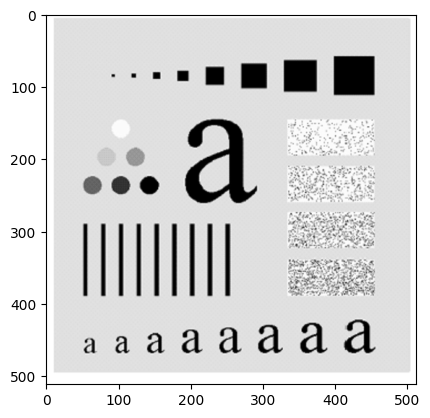

In [126]:
img=cv2.imread('images/alphabet.jpg',0)
img=cv2.resize(img,(512,512))
plt.imshow(img,cmap='gray')

Add function for adding gaussian noise of the image

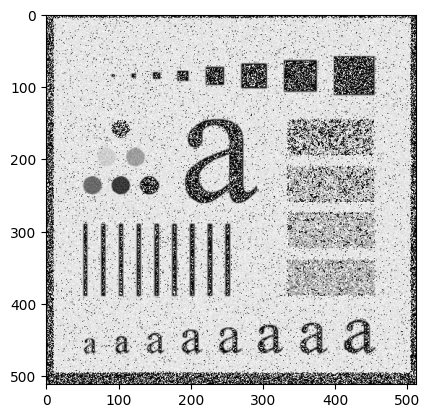

In [127]:
noise=addNoise(7,13,img)
noise_img=img+noise
plt.imshow(noise_img,cmap='gray')


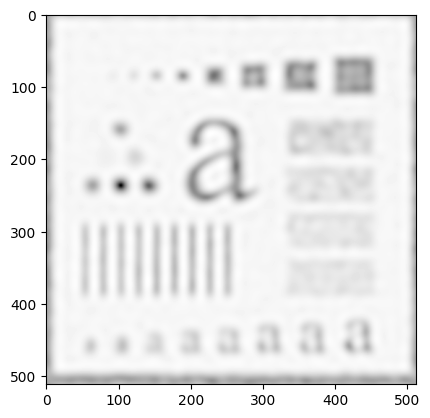

In [132]:
noisy_img_fft=np.fft.fftshift(np.fft.fft2(noise_img))
filtered_img = butterwardFilter(noisy_img_fft, 25, 5)

plt.imshow(filtered_img,cmap='gray')

Apply_ButterworthFilter

In [129]:
# radius,order=50,4
# butterworth_filtered_image=butterwardFilter(noisy_img_fft,radius,order)
# plt.imshow(butterworth_filtered_image,cmap='gray')
